6.1 考察平面上的6个数据采样:
$$
x^{(1)} = (-1, 0),\qquad y^{(1)} = +1\\  
x^{(2)} = (-1, 1), \qquad    y^{(2)} = +1\\
x^{(3)} = (0, 1), \qquad   y^{(3)} = +1\\
x^{(4)} = (1, 0), \qquad    y^{(4)} = -1\\
x^{(5)} = (1, -1),  \qquad   y^{(5)} = -1\\
x^{(6)} = (0, -1), \qquad    y^{(6)} = -1\\
$$
请计算这6个数据采样的最大间隔分离平面，并指出相应的支持向重。

最大间隔分离平面是$x_1-x_2=0$，支持向量为$(0,1),(-1,0),(0,-1),(1,0)$

6.2 设$S$是一组训练数据，且正负采样之间存在分离平面。设$L$是一个间隔最大的分离平面。请证明$L$的支持向量中一定既有正采样又有负采样。

如果只有正采样或者只有负采样，那么L就不是间隔最大的分离平面。

6.3 类别预测的置信度  
  
$Logistic$回归算法基于概率预测来完成类别预测任务，从而可以用概率来表示类别预测的置信度：样本属于某类别的概率预测值越大， 则将其归为该类别的置信度就越高。然而， 支持向量机直接完成类别预测任务，并不进行概率预测。那么，应当如何表示支持向量机算法的类别预测置信度呢？一个常用的方法是通过样本与分离平面之间的距离来表示置信度：距离越大，置信度就越高。请在图6.6的支持向量机算法中增加一个函数$predict_confidence$来完成对置信度的计算。

In [0]:
def predict_confidence(self, X, y):
    return sigmoid(np.abs(X.dot(self.w) + self.b) / np.sqrt(np.sum(w**2)))

6.4 One-versus-All 方法   
  One-versus-All方法是一 种用二元分类问题的算法来求解$k$元分类问题的重要手段。设A是一个二元分类问题算法。对于一个给定的$k$元分类问题，设其标签类别为$1,2,\dots ,k$。对每一个元分类问题算法。对于一个给定的$k$元分类问题，设其标签类别为$1,2,\dots ,k$。对每一个$1≤i≤k$，考虑如下二元分类问题:如果样本的类别等于$i$，则生成标签+1,否则生成标签-1.对如此定义的一个二元分类问题,用算法A训练出一个模型$h_i$:对任意一个样本$x,h_i(x)$表示x属于类别i的概率(或者说置信度)。依此方法可以得到k个模型$h_i,h_2,\dots h_k$。 对一个样本x，One-versus AlI方法预测$x$所属的类别为
$$
\arg \max \limits_{1\leq i\leq k}{h_i(x)} 
$$
请结合习题6.3， 实现One-versus-All方法,从而将支持向量机算法拓展到$k$元分类问题中。

In [0]:
import numpy as np

class SVM:
    def get_H(self, Lambda, i, j, y):
        if y[i]==y[j]:
            return Lambda[i] + Lambda[j]
        else:
            return float("inf")
    
    def get_L(self, Lambda, i, j, y):
        if y[i]==y[j]:
            return 0.0
        else:
            return max(0, Lambda[j] - Lambda[i])
            
    def smo(self, X, y, K, N):
        m, n = X.shape
        Lambda = np.zeros((m,1))
        epsilon = 1e-6
        for t in range(N):
            for i in range(m):
                for j in range(m):
                    D_ij = 2 * K[i][j] - K[i][i] - K[j][j]
                    if abs(D_ij) < epsilon:
                        continue
                    E_i = K[:, i].dot(Lambda * y) - y[i]
                    E_j = K[:, j].dot(Lambda * y) - y[j]
                    delta_j = 1.0 * y[j] * (E_j - E_i) / D_ij
                    H_ij = self.get_H(Lambda, i, j, y)
                    L_ij = self.get_L(Lambda, i, j, y)
                    if Lambda[j] + delta_j > H_ij:
                        delta_j = H_ij - Lambda[j]
                        Lambda[j] = H_ij
                    elif Lambda[j] + delta_j < L_ij:
                        delta_j = L_ij - Lambda[j]
                        Lambda[j] = L_ij
                    else:
                        Lambda[j] += delta_j
                    delta_i = - y[i] * y[j] * delta_j
                    Lambda[i] += delta_i
                    if Lambda[i] > epsilon:
                        b = y[i] - K[:, i].dot(Lambda * y)
                    elif Lambda[j] > epsilon:
                        b = y[j] - K[:, j].dot(Lambda * y)
        self.Lambda = Lambda
        self.b = b
        
    def fit(self, X, y, N = 10):
        K = X.dot(X.T)
        self.smo(X, y, K, N)
        self.w = X.T.dot(self.Lambda * y)
        
    def predict_confidence(self, X):
        return sigmoid(np.abs(X.dot(self.w) + self.b) / np.sqrt(np.sum(w**2)))
    
    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)

In [0]:
# 有k个类,标签分别是1,2,3...k
def SVM_OVA(X_train, y_train, X_test)
    confidences = np.zeros((len(X_test), 1))
    for i in range(1,k+1):
        y_train_copy = y_train.copy() # 重新copy一份标签副本
        y_train_copy[y_train_copy == i] = 1  # 将标签是i的置为1
        y_train_copy[y_train_copy != i] = -1 # 将标签不是i的置为-1
        model = SVM()
        model.fit(X_train, y_train_copy) # 训练模型
        confidence = model.predict_confidence(X_test) # 计算置信度
        confidences = np.concatenate((confidences, confidence), axis=1) # 添加第i个模型的分类置信度
    y_pred = np.argmax(confidences, axis=1) # 预测结果
    return y_pred

6.5 设$K_1(x,z$和$K_2(x, z)$是两个核函数，$a>0$是一个正实数。请证明  
(1) $K(x, z) = K_1(x, z) + K_2(x,z)$也是一个核函数。  
(2) $K(x, z) = aK_1(x, z)$ 也是一个核函数。  
(3) $K(x, z) = K_1(x, z)K_2(x,z)$也是一个核函数。

因为$K_1(x,z)和K_2(x,z)$是两个核函数，所以$K_1=(K_{1ij})_{1\le i,j\le m},K_2=(K_{2ij})_{1\le i,j\le m}$为半正定矩阵，即对任意向量$z$，有$z^TK_1z\ge 0,z^TK_2z\ge 0$

（1）因为$z^T(K_1+K_2)z=z^TK_1z+z^TK_2z\ge0$，所以$K(x,z)=K_1(x,z)+K_2(x,z)$是核函数

（2）因为$\alpha>0$所以$\alpha z^TK_1z\ge0$，所以$K(x,z)=\alpha K_1(x,z)$是核函数

（3）因为
$$
z^TK_1K_2z=\sum_{i,j,k=1}^m z_iK_{1ij}K_{2jk}z_k
=\sum_{i,j,k=1}^m z_i\langle\phi_1(x^{(i)}),\phi_1(x^{(j)})\rangle \langle \phi_2(x^{(j)}),\phi_2(x^{(k)})\rangle z_k\\
=\sum_{i,j,k=1}^m z_i(\sum_{t=1}^N\phi_{1t}(x^{(i)})\phi_{1t}(x^{(j)})) (\sum_{t=1}^N\phi_{2t}(x^{(j)})\phi_{2t}(x^{(k)}))  z_k\\
=\sum_{i,j=1}^m  z_i(\sum_{t=1}^N\phi_{1t}(x^{(i)})\phi_{1t}(x^{(j)})) \sum_{j,k=1}^m(\sum_{t=1}^N\phi_{2t}(x^{(j)})\phi_{2t}(x^{(k)}))  z_k \\
=\sum_{t=1}^N \sum_{i,j,k=1}^m z_i \phi_{1t}(x^{(i)})\phi_{1t}(x^{(j)})\phi_{2t}(x^{(j)})\phi_{2t}(x^{(k)})z_k
$$

6.6 图6.20 实现了软间隔支持向量机的次梯度下降算法。请修改图6.20中的算法以实现软间隔支持向量机的随机梯度下降算法。
![6.20.png](6.20.png)

In [0]:
import numpy as np
class SoftSVM:
    def __init__(self, C=1000):
        self.C = C
    def fit(self, X, y, eta=0.01, N=5000):
        m, n = X.shape
        w, b = np.zeros((n, 1)), 0
        for r in range(N):
            i = np.random.randint(m)
            x = X[i].reshape(1,-1)
            s = (x.dot(w) + b) * y
            e = (s < 1).astype(np.int).reshape(-1,1)
            g_w = -1/m * x.T.dot(y * e) + 1 / (m * self.C) * w
            g_b = -1/m * (y * e).sum()
            w = w - eta * g_w
            b = b - eta * g_b
        self.w = w
        self.b = b
    def predict(self, X):
        return np.sign(X.dot(self.w)+self.b)

6.7 图6.16是软间隔支持向量机的SMO算法。由于该算法只涉及内积计算.所以核方法也可以用到软间隔支持向量机中。请修改图6.16中的算法以实现软间隔支持向量机的核方法。
![6.16.png](6.16.png)

In [0]:
from machine_learning.lib.svm_smo import SVM

class SoftSVM(SVM):
    def __init__(self, C=1000, kernel=None):
        self.C = C
        self.kernel = kernel
        
    def get_H(self, Lambda, i, j, y):
        C = self.C
        if y[i] == y[j]:
            return min(C, Lambda[i] + Lambda[j])
        else:
            return min(C, C+Lambda[j]-Lambda[i])
        
    def get_L(self, Lambda, i, j, y):
        if y[i] == y[j]:
            return max(0, Lambda[i]+Lambda[j]-self.C)
        else:
            return max(0, Lambda[j]-Lambda[i])
    
    def get_K(self, X_1, X_2):
        if self.kernel == None:
            return X_1.dot(X_2.T)
        m1, m2 = len(X_1), len(X_2)
        K = np.zeros((m1, m2))
        for i in range(m1):
            for j in range(m2):
                K[i][j] = self.kernel(X_1[i], X_2[j])
        return K
    
    def fit(self, X, y, N=10):
        K = self.get_K(X, X)
        self.smo(X, y, K, N)
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        K = self.get_K(X, self.X_train)
        return np.sign(K.dot(self.Lambda*self.y_train)+self.b)

6.8 第2章介绍过感知器算法。在感知器算法中，如果发现一个负采样$(x^{(i)}, y^{(i)})$位于当前直线$\left \langle w, x \right \rangle + b$ 的上方.则以如下的方式更新模型参数:
$$
w \leftarrow w + y^{(i)} x^{(i)} \\
b \leftarrow b + y^{(i)}
$$
类似地，当发现一个正采样位于当前直线的下方时，也以用上述方式更新参数值。请问，应当如何将核方法运用到感知器算法中?请描述并实现感知器算法的核方法。

基于核函数的非线性判别函数为
$$
f^H(x)=\sum_{i=1}^m \lambda_i y^{(i)}K(x^{(i)},x)+b
$$
if $f^H(x^{(k)})y^{(k)}<0$  
then $\lambda_i \leftarrow \lambda_i + y^{(i)}y^{(k)}K(x^{(i)},x^{(k)})$   
$\quad b \leftarrow b + y^{(k)}$

In [0]:
class KernelPerceptron:
    def __init__(self, kernel=None):
        self.kernel = kernel
    def get_K(self, X_1, X_2):
        if self.kernel == None:
            return X_1.dot(X_2.T)
        m1, m2 = len(X_1), len(X_2)
        K = np.zeros((m1, m2))
        for i in range(m1):
            for j in range(m2):
                K[i][j] = self.kernel(X_1[i], X_2[j])
        return K
    def fit(self, X, y):
        K = self.get_K(X, X)
        m, _ = X.shape
        Lambda = np.zeros((m,1))
        b = 0
        done = False
        while not done:
            done = True
            for i in range(m):
                x = X[i].reshape(1, -1)
                for k in range(m):
                    if y[k] * (np.sum(Lambda[i] * y[i] * K[i][k]) + b) < =:
                        Lambda[i] = Lambda[i] + y[i]*y[k]*K[i][k]
                        b = b + y[k]
        self.Lambda = Lambda
        self.b = b
    def predict(self, X):
        K = self.get_K(X, self.X_train)
        return np.sign(K.dot(self.Lambda*self.y_train)+self.b)

6.9 国际政治家面部识别
在 Sklearn 的数据库中集成了一组由7位国际政治家 Ariel Sharon、Colin Powell、Donald Rumsfeld、George Bush、Gerhard Schroder、Hugo Chavez 和 Tony Blair 的面部组成的图片集。图6.21是4幅图片采样，从左到右分别为 Gerhard Schroder、George Bush、Colin Powell 和 Tony Blair。  
![6.21](6.21.png)  
在Sklearn数据集中有1288条数据。每条数据的特征组是-个1850 维的向量。数据表示的是一一个50X37的图片像素灰度矩阵。标签是一个0-6的整数,分别表示7位政治家。图6.22是获取与观察数据的程序。第2行导入获取数据的函数fetch_lfw_people。第5行调用该函数读取数据。第6行打印target_names,从而可以获得标签与人名的对应关系，例如标签3对应George Bush。第7.8行分别获取特征与标签。第10-12行打印出一张图片。  
![6.22](6.22.png)  
基于这一数据集,请对每一位政治家完成如下任务: 给定一张图片，预测图片中的人物是否为这位政治家。

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


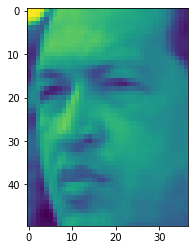

In [0]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(lfw_people.target_names)
X = lfw_people.data
y = lfw_people.target

m, h, w = lfw_people.images.shape
plt.imshow(X[0].reshape(h, w))
plt.show()

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

target_names = lfw_people.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.25      0.40        24
     Colin Powell       0.73      0.80      0.77        45
  Donald Rumsfeld       0.83      0.52      0.64        29
    George W Bush       0.68      0.97      0.80       134
Gerhard Schroeder       0.59      0.40      0.48        25
      Hugo Chavez       1.00      0.33      0.50        24
       Tony Blair       0.79      0.66      0.72        41

         accuracy                           0.72       322
        macro avg       0.80      0.56      0.61       322
     weighted avg       0.76      0.72      0.69       322



6.10 支持向量机与回归问题。  
本章中介绍的软间隔支持向量机算法是分类问题算法。然而，也可以将其拓展到回归问题中。在一个回归问题中，设$S=\left \{ (x^{(1)}, y^{(1)}),(x^{(2)}, y^{(2)}), \dots (x^{(m)}, y^{(m)}) \right \}$为m条训练数据。回归问题的支持向量机模型假设为线性模型$h_w(x) = \left \langle w, x \right \rangle + b$，任务是计算如下问题的最优解$w^*、b^*$:  
$$
\min \limits_ {w, b, \xi ,\eta } \frac{1}{2} \left \| w \right \|^2 + C\sum _{i=1}^{m} (\xi _i + \eta _i) \\
约束：\left \langle w, x^{(i)} \right \rangle + b - y^{(i)} \leq \xi _i,\qquad i=1,2,\dots , m \\
y^{(i)} - \left \langle w, x^{(i)} \right \rangle -b \leq \eta  _i ,\qquad i=1,2,\dots , m \\
\xi _i \geq 0,\qquad i=1,2,\dots , m \\ 
\eta _i \geq 0,\qquad i=1,2,\dots , m
$$
(1)请描述式(6.70)中优化问题的对偶问题，并设计求解对偶问题的坐标下降算法。
(2)请设计直接优化式(6.70)的梯度下降算法。

（1）式(6.70)的拉格朗日函数如下
$$
\begin{aligned}
&L(w,b,\xi,\eta,\lambda,\beta,\lambda^*,\beta^*)\\
&=\frac{1}{2}\|w\|^2+C\sum_{i=1}^m(\xi_i+\eta_i)-\sum_{i=1}^m\lambda_i^*\xi_i-\sum_{i=1}^m\beta_i^*\eta_i  \\
&+\sum_{i=1}^m\lambda_i(\langle w,x^{(i)}\rangle+b-y^{(i)}-\xi_i)+\sum_{i=1}^m\beta_i(y^{(i)}-\langle w,x^{(i)}\rangle-b-\eta_i) \qquad\qquad (1)
\end{aligned}
$$

令$L(w,b,\xi,\eta,\lambda,\beta,\lambda^*,\beta^*)$对$w,b,\xi_i,\eta_i$的偏导数为0可得
$$
\begin{equation}
\begin{split}
&w=\sum_{i=1}^m(\beta_i-\lambda_i)x^{(i)}\quad\qquad(2)\\
&0=\sum_{i=1}^m(\beta_i-\lambda_i)\ \ \ \ \qquad\qquad (3)\\
&C=\lambda_i+\lambda_i^*\qquad \quad \quad \ \ \  \qquad (4)\\
&C=\beta_i+\beta_i^*\qquad \quad \quad \ \ \ \ \qquad (5)
\end{split}
\end{equation}
$$
将式(2)-(5)代入(1)，即可得(6.70)中优化问题的对偶问题
$$
\begin{aligned}
&\max_{\lambda,\beta}\sum_{i=1}^my^{(i)}(\beta_i-\lambda_i)-\frac{1}{2}\sum_{i,j=1}^m(\beta_i-\lambda_i)(\beta_j-\lambda_j)\langle x^{(i)}, x^{(j)} \rangle\\
&约束：\sum_{i=1}^m(\beta_i-\lambda_i)=0,\ \ \ \ \ \ 0\le\lambda_i, \beta_i \le C
\end{aligned}
$$
上述过程需要满足KKT条件，即要求


$$
\left\{
\begin{aligned}
&w=\sum_{i=1}^m(\beta_i-\lambda_i)x^{(i)}\\
&(C-\lambda_i)\xi_i=0,\ \ (C-\beta_i)\eta_i=0  \\
&\lambda_i(\langle w,x^{(i)}\rangle+b-y^{(i)}-\xi_i)=0\\
&\beta_i(y^{(i)}-\langle w,x^{(i)}\rangle-b-\eta_i)=0
\end{aligned}
\right.
$$
当$\langle w,x^{(i)} \rangle + b - y^{(i)} - \xi_i = 0$时$\lambda_i$取非零值，当$ y^{(i)}-\langle w,x^{(i)} \rangle - b -\eta_i = 0$时$\beta_i$取非零值，约束$\langle w,x^{(i)} \rangle + b - y^{(i)} - \xi_i = 0$和$ y^{(i)}-\langle w,x^{(i)} \rangle - b -\eta_i = 0$不能同时成立，因此$\lambda_i$和$\beta_i$中至少有一个为零。

若$0<\lambda_i<C$，则必有$\xi_i=0$，进而有
$$
b=y^{(i)}-\langle w,x^{(i)} \rangle=y^{(i)}-\sum_{j=1}^m(\beta_j-\lambda_j)\langle x^{(j)},x^{(i)}\rangle
$$
采用一种更鲁棒的方法：求平均值，假设满足要求的样本集合为S
$$
b=\frac{1}{|S|}\sum_{s \in S}(y^{(s)}-\sum_{j=1}^m(\beta_j-\lambda_j)\langle x^{(j)},x^{(s)}\rangle)
$$
(2)
不会做，以下是瞎写的^_^
$$
\frac{\partial L }{\partial w} = w + \sum_{i=1}^m (\lambda_i-\beta_i) x^{(i)}\\
\frac{\partial L }{\partial b} = \sum_{i=1}^m(\lambda_i-\beta_i)\\
w \leftarrow w - \frac{\partial L }{\partial w}\\
b \leftarrow b - \frac{\partial L }{\partial b}\\
$$